# Bimodal distribution (mixture of two 1d Gaussians)

In [1]:
import os

try:
    import seaborn as sns
except:
    %pip install seaborn
    import seaborn as sns
    
try:
    import matplotlib.pyplot as plt
except:
    %pip install matplotlib
    import matplotlib.pyplot as plt
    
try:
    import scipy
except:
    %pip install scipy
    import scipy
from scipy.stats import norm

try:
    import jax
except:
    import jax
    %pip install numpy
    
import jax.numpy as jnp

In [2]:
dev_mode = "DEV_MODE" in os.environ

if dev_mode:
    import sys

    sys.path.append("../scripts")
    import pyprobml_utils as pml
    from latexify import latexify

    latexify(width_scale_factor=2, fig_height=1.5)

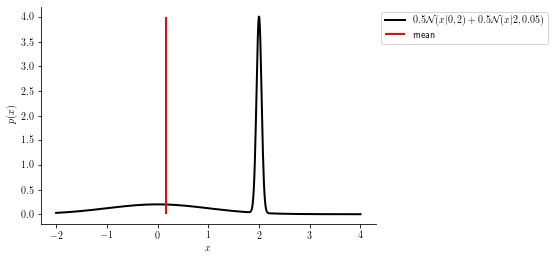

In [3]:
# Define two normal distrubutions and their corresponding weights.
mu = [0, 2]
sigma = [1, 0.05]
n = [norm(loc=mu[i], scale=sigma[i]) for i in range(2)]
w = [0.5, 0.5]

#enable latex text
plt.rc("text", usetex=True)

# Define a set of x points for graphing.
xs = jnp.linspace(-2, 2*mu[1], 600)

# Combine the two distributions by their weights, evaluated at the x points.
p = sum(w[i] * n[i].pdf(xs) for i in range(2))

# Calculate the mean of the final distribution.
mean_p = jnp.mean(xs * p)

# Plot the final distribution and its mean.
linewidth = 2
p = sum(w[i] * n[i].pdf(xs) for i in range(2))
plt.plot(xs, p, 'black', linewidth=linewidth, label = "$0.5\mathcal{N}(x|0,2) + 0.5\mathcal{N}(x|2,0.05)$");

plt.vlines(mean_p, ymin=0, ymax=max(p), color='red', linewidth=linewidth, label="mean")

#xlabel
plt.xlabel("$x$")

#ylabel
plt.ylabel("$p(x)$")

#legend
plt.legend(bbox_to_anchor=(1,1));

#format axes
sns.despine()

if dev_mode:
    pml.savefig('bimodalSpike_latexified.pdf');


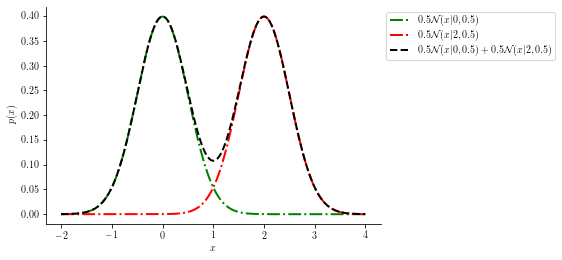

In [4]:
# Another example, with two modes
mu = [0, 2]
sigma = [0.5, 0.5]
n = [norm(loc=mu[i], scale=sigma[i]) for i in range(2)]
w = [0.5, 0.5]
xs = jnp.linspace(-2, 2*mu[1], 600)

plt.figure()

#enable latex text
plt.rc("text", usetex=True)

#Plot first distribution
linewidth_secondary = 2
plt.plot(xs, w[0] * n[0].pdf(xs), 'g-.',  linewidth=linewidth_secondary, label="$0.5\mathcal{N}(x|0,0.5)$");

#Plot second distribution
plt.plot(xs, w[1] * n[1].pdf(xs), 'r-.', linewidth=linewidth_secondary, label="$0.5\mathcal{N}(x|2,0.5)$");

#plot final distribution
linewidth = 2
p = sum(w[i] * n[i].pdf(xs) for i in range(2))
plt.plot(xs, p, 'k',linestyle="dashed", linewidth=linewidth, label = "$0.5\mathcal{N}(x|0,0.5) + 0.5\mathcal{N}(x|2,0.5)$");
plt.legend(bbox_to_anchor=(1,1));

#xlabel
plt.xlabel("$x$")

#ylabel
plt.ylabel("$p(x)$")

#format axes
sns.despine()

if dev_mode:
    pml.savefig('bimodalDistribution_latexified.pdf')